In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x_data = mnist.train.images
y_data = mnist.train.labels

x_test = mnist.test.images
y_test = mnist.test.labels

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='sigmoid', dtype='float32'),
    tf.keras.layers.Dense(500, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='sigmoid', dtype='float32'),
    tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='softmax', dtype='float32')    
])

sgd = tf.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, 
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

model.fit(x_data, y_data, batch_size=100, verbose=1, epochs=15)


hypothesis = model.predict(x_data)
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(y_data, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))  

print("Train ACC : ", accuracy.numpy())

hypothesis = model.predict(x_test)
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(y_test, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))  

print("Test ACC : ", accuracy.numpy())

Train on 55000 samples
Epoch 1/15
55000/55000 [==============================] - 15s 280us/sample - loss: 2.3051 - acc: 0.1172
Epoch 2/15
55000/55000 [==============================] - 15s 266us/sample - loss: 2.2903 - acc: 0.1339
Epoch 3/15
55000/55000 [==============================] - 15s 264us/sample - loss: 2.2818 - acc: 0.1527
Epoch 4/15
55000/55000 [==============================] - 15s 267us/sample - loss: 2.2733 - acc: 0.1929
Epoch 5/15
55000/55000 [==============================] - 14s 262us/sample - loss: 2.2648 - acc: 0.2097
Epoch 6/15
55000/55000 [==============================] - 14s 261us/sample - loss: 2.2561 - acc: 0.2599
Epoch 7/15
55000/55000 [==============================] - 14s 263us/sample - loss: 2.2474 - acc: 0.2655
Epoch 8/15
55000/55000 [==============================] - 15s 266us/sample - loss: 2.2384 - acc: 0.3121
Epoch 9/15
55000/55000 [==============================] - 15s 275us/sample - loss: 2.2293 - acc: 0.3625 - loss: 2.2296
Epoch 10/15
55000/55000 [=

Label :  [6]
Prediction :  [0]


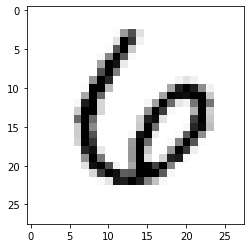

In [4]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label : ", np.argmax(mnist.test.labels[r:r+1], 1))
print("Prediction : ", tf.argmax(model.predict(mnist.test.images[r:r+1]), 1).numpy())

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='sigmoid', dtype='float32'),
    tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='sigmoid', dtype='float32'),
    tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='sigmoid', dtype='float32'),
    tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='sigmoid', dtype='float32'),
    tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='softmax', dtype='float32')
])

adam = tf.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

model.fit(x_data, y_data, batch_size=100, verbose=1, epochs=50)

hypothesis = model.predict(x_data)
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(y_data, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))  

print("Train ACC : ", accuracy.numpy())

hypothesis = model.predict(x_test)
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(y_test, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))  

print("Test ACC : ", accuracy.numpy())

Train on 55000 samples
Epoch 1/50
55000/55000 [==============================] - 33s 592us/sample - loss: 0.6282 - acc: 0.7908
Epoch 2/50
55000/55000 [==============================] - 32s 573us/sample - loss: 0.2052 - acc: 0.9381
Epoch 3/50
55000/55000 [==============================] - 31s 566us/sample - loss: 0.1426 - acc: 0.9567
Epoch 4/50
55000/55000 [==============================] - 32s 588us/sample - loss: 0.1119 - acc: 0.9661
Epoch 5/50
55000/55000 [==============================] - 32s 573us/sample - loss: 0.0902 - acc: 0.9728
Epoch 6/50
55000/55000 [==============================] - 33s 608us/sample - loss: 0.0747 - acc: 0.9768
Epoch 7/50
55000/55000 [==============================] - 31s 572us/sample - loss: 0.0620 - acc: 0.9807
Epoch 8/50
55000/55000 [==============================] - 32s 575us/sample - loss: 0.0505 - acc: 0.9841
Epoch 9/50
55000/55000 [==============================] - 32s 576us/sample - loss: 0.0403 - acc: 0.9875
Epoch 10/50
55000/55000 [================

Label :  [0]
Prediction :  [0]


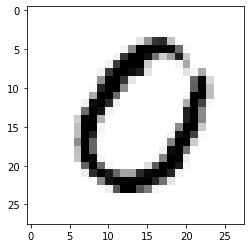

In [6]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label : ", np.argmax(mnist.test.labels[r:r+1], 1))
print("Prediction : ", tf.argmax(model.predict(mnist.test.images[r:r+1]), 1).numpy())

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [7]:
rate = 0.3

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.he_normal(),
                          activation='relu', dtype='float32'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.he_normal(),
                          activation='relu', dtype='float32'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.he_normal(),
                          activation='relu', dtype='float32'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.he_normal(),
                          activation='relu', dtype='float32'),
    tf.keras.layers.Dropout(rate),
    tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.he_normal(),
                          activation='softmax', dtype='float32')
])

adam = tf.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

model.fit(x_data, y_data, batch_size=100, verbose=1, epochs=50)

hypothesis = model.predict(x_data)
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(y_data, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))  

print("Train ACC : ", accuracy.numpy())

hypothesis = model.predict(x_test)
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(y_test, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))  

print("Test ACC : ", accuracy.numpy())

Train on 55000 samples
Epoch 1/50
55000/55000 [==============================] - 37s 668us/sample - loss: 0.3577 - acc: 0.8890
Epoch 2/50
55000/55000 [==============================] - 35s 635us/sample - loss: 0.1646 - acc: 0.9525
Epoch 3/50
55000/55000 [==============================] - 35s 640us/sample - loss: 0.1239 - acc: 0.9635
Epoch 4/50
55000/55000 [==============================] - 35s 635us/sample - loss: 0.1059 - acc: 0.9693
Epoch 5/50
55000/55000 [==============================] - 35s 636us/sample - loss: 0.0919 - acc: 0.9735
Epoch 6/50
55000/55000 [==============================] - 35s 635us/sample - loss: 0.0795 - acc: 0.9771
Epoch 7/50
55000/55000 [==============================] - 35s 636us/sample - loss: 0.0739 - acc: 0.9783
Epoch 8/50
55000/55000 [==============================] - 35s 638us/sample - loss: 0.0691 - acc: 0.9802
Epoch 9/50
55000/55000 [==============================] - 35s 635us/sample - loss: 0.0612 - acc: 0.9819
Epoch 10/50
55000/55000 [================

Label :  [9]
Prediction :  [9]


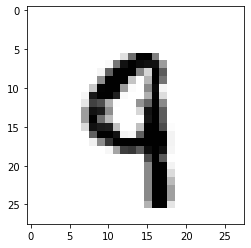

In [8]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label : ", np.argmax(mnist.test.labels[r:r+1], 1))
print("Prediction : ", tf.argmax(model.predict(mnist.test.images[r:r+1]), 1).numpy())

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()